In [1]:
a = [-3.14, 0, 3.14]
a

[-3.14, 0, 3.14]

In [4]:
import numpy as np

a = np.linspace(-np.pi, np.pi, 100)
a

array([-3.14159265, -3.07812614, -3.01465962, -2.9511931 , -2.88772658,
       -2.82426006, -2.76079354, -2.69732703, -2.63386051, -2.57039399,
       -2.50692747, -2.44346095, -2.37999443, -2.31652792, -2.2530614 ,
       -2.18959488, -2.12612836, -2.06266184, -1.99919533, -1.93572881,
       -1.87226229, -1.80879577, -1.74532925, -1.68186273, -1.61839622,
       -1.5549297 , -1.49146318, -1.42799666, -1.36453014, -1.30106362,
       -1.23759711, -1.17413059, -1.11066407, -1.04719755, -0.98373103,
       -0.92026451, -0.856798  , -0.79333148, -0.72986496, -0.66639844,
       -0.60293192, -0.53946541, -0.47599889, -0.41253237, -0.34906585,
       -0.28559933, -0.22213281, -0.1586663 , -0.09519978, -0.03173326,
        0.03173326,  0.09519978,  0.1586663 ,  0.22213281,  0.28559933,
        0.34906585,  0.41253237,  0.47599889,  0.53946541,  0.60293192,
        0.66639844,  0.72986496,  0.79333148,  0.856798  ,  0.92026451,
        0.98373103,  1.04719755,  1.11066407,  1.17413059,  1.23

In [6]:
b = np.cos(a)
b

array([-1.        , -0.99798668, -0.99195481, -0.9819287 , -0.9679487 ,
       -0.95007112, -0.92836793, -0.90292654, -0.87384938, -0.84125353,
       -0.80527026, -0.76604444, -0.72373404, -0.67850941, -0.63055267,
       -0.58005691, -0.52722547, -0.47227107, -0.41541501, -0.35688622,
       -0.29692038, -0.23575894, -0.17364818, -0.1108382 , -0.04758192,
        0.01586596,  0.07924996,  0.14231484,  0.20480667,  0.26647381,
        0.32706796,  0.38634513,  0.44406661,  0.5       ,  0.55392006,
        0.60560969,  0.65486073,  0.70147489,  0.74526445,  0.78605309,
        0.82367658,  0.85798341,  0.88883545,  0.91610846,  0.93969262,
        0.95949297,  0.97542979,  0.98743889,  0.99547192,  0.99949654,
        0.99949654,  0.99547192,  0.98743889,  0.97542979,  0.95949297,
        0.93969262,  0.91610846,  0.88883545,  0.85798341,  0.82367658,
        0.78605309,  0.74526445,  0.70147489,  0.65486073,  0.60560969,
        0.55392006,  0.5       ,  0.44406661,  0.38634513,  0.32

In [7]:
c = np.sin(a)
c

array([-1.22464680e-16, -6.34239197e-02, -1.26592454e-01, -1.89251244e-01,
       -2.51147987e-01, -3.12033446e-01, -3.71662456e-01, -4.29794912e-01,
       -4.86196736e-01, -5.40640817e-01, -5.92907929e-01, -6.42787610e-01,
       -6.90079011e-01, -7.34591709e-01, -7.76146464e-01, -8.14575952e-01,
       -8.49725430e-01, -8.81453363e-01, -9.09631995e-01, -9.34147860e-01,
       -9.54902241e-01, -9.71811568e-01, -9.84807753e-01, -9.93838464e-01,
       -9.98867339e-01, -9.99874128e-01, -9.96854776e-01, -9.89821442e-01,
       -9.78802446e-01, -9.63842159e-01, -9.45000819e-01, -9.22354294e-01,
       -8.95993774e-01, -8.66025404e-01, -8.32569855e-01, -7.95761841e-01,
       -7.55749574e-01, -7.12694171e-01, -6.66769001e-01, -6.18158986e-01,
       -5.67059864e-01, -5.13677392e-01, -4.58226522e-01, -4.00930535e-01,
       -3.42020143e-01, -2.81732557e-01, -2.20310533e-01, -1.58001396e-01,
       -9.50560433e-02, -3.17279335e-02,  3.17279335e-02,  9.50560433e-02,
        1.58001396e-01,  

In [8]:
b @ c

np.float64(9.853229343548264e-16)

In [12]:
from scipy.stats import norm
from scipy.integrate import quad

ϕ = norm()
value, error = quad(ϕ.pdf, -2, 2)  # Integrate using Gaussian quadrature
value

0.9544997361036417

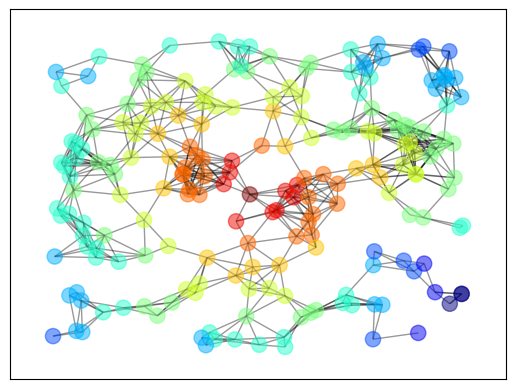

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
np.random.seed(1234)

# Generate a random graph
p = dict((i, (np.random.uniform(0, 1), np.random.uniform(0, 1)))
         for i in range(200))
g = nx.random_geometric_graph(200, 0.12, pos=p)
pos = nx.get_node_attributes(g, 'pos')

# Find node nearest the center point (0.5, 0.5)
dists = [(x - 0.5)**2 + (y - 0.5)**2 for x, y in list(pos.values())]
ncenter = np.argmin(dists)

# Plot graph, coloring by path length from central node
p = nx.single_source_shortest_path_length(g, ncenter)
plt.figure()
nx.draw_networkx_edges(g, pos, alpha=0.4)
nx.draw_networkx_nodes(g,
                       pos,
                       nodelist=list(p.keys()),
                       node_size=120, alpha=0.5,
                       node_color=list(p.values()),
                       cmap=plt.cm.jet_r)
plt.show()